# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.multioutput import MultiOutputClassifier

# Importing Data

In [6]:
path = r'C:\Users\david\Desktop\Machine Learning - Achievement 1'

### Scaled Climate Data

In [8]:
df_climate_scaled = pd.read_pickle(os.path.join(path, 'Data Sets', 'climate_data_scaled.pkl'))

In [9]:
df_climate_scaled.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


### Pleasant Weather Answers Data

In [11]:
df_pleasant_weather_answers = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [12]:
df_pleasant_weather_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Comparing Columns of the Two Datasets

In [14]:
# reducing climate data to only temp variables
temp_data = [col for col in df_climate_scaled.columns if 'temp' in col]

In [15]:
temp_data

['BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',


In [16]:
df_pleasant_weather_answers.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

### The pleasant weather dataset does not contain data for Gdansk, Tours, or Roma. These will be need to be dropped from the scaled climate data.

In [18]:
columns_to_drop = [ 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'ROMA_temp_mean']

In [19]:
for column in columns_to_drop:
    temp_data.remove(column)
    print('Removing ' + column)

Removing GDANSK_temp_mean
Removing GDANSK_temp_min
Removing GDANSK_temp_max
Removing TOURS_temp_mean
Removing TOURS_temp_min
Removing TOURS_temp_max
Removing ROMA_temp_mean


In [20]:
temp_data

['BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']

# K-Nearest Model Setup

In [22]:
df = df_climate_scaled[temp_data]

In [23]:
df.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,-1.136839,-0.114356,...,-0.474865,-0.124331,-0.170125,-0.063322,-0.391072,-0.290439,-0.639538,-0.668215,-0.519743,-0.752237
1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,-1.341204,-0.367511,...,-0.582847,-0.650834,-0.456455,-0.839563,-0.415953,-0.183610,-0.628550,-0.548046,-0.629054,-0.407141
2,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,-1.116403,-0.509912,...,-0.777215,-0.650834,-0.384873,-0.898147,-0.615003,-0.410621,-0.727444,-0.067372,0.054135,-0.177078
3,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,-1.208367,-0.525734,...,-0.582847,-0.943336,-0.800052,-1.059254,-0.764290,-0.530804,-0.925231,-0.998679,-0.164486,-0.838511
4,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,-1.116403,-0.320045,...,-0.582847,-0.621584,-0.671203,-0.546642,-0.503037,-0.477389,-0.705467,-1.509396,-1.339569,-1.471186


In [24]:
X = df
y = df_pleasant_weather_answers.drop(['DATE'], axis=1)

In [25]:
X.shape

(22950, 45)

In [26]:
y.shape

(22950, 15)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [68]:
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

# Confusion Matrices

### Training Set Confusion Matrix

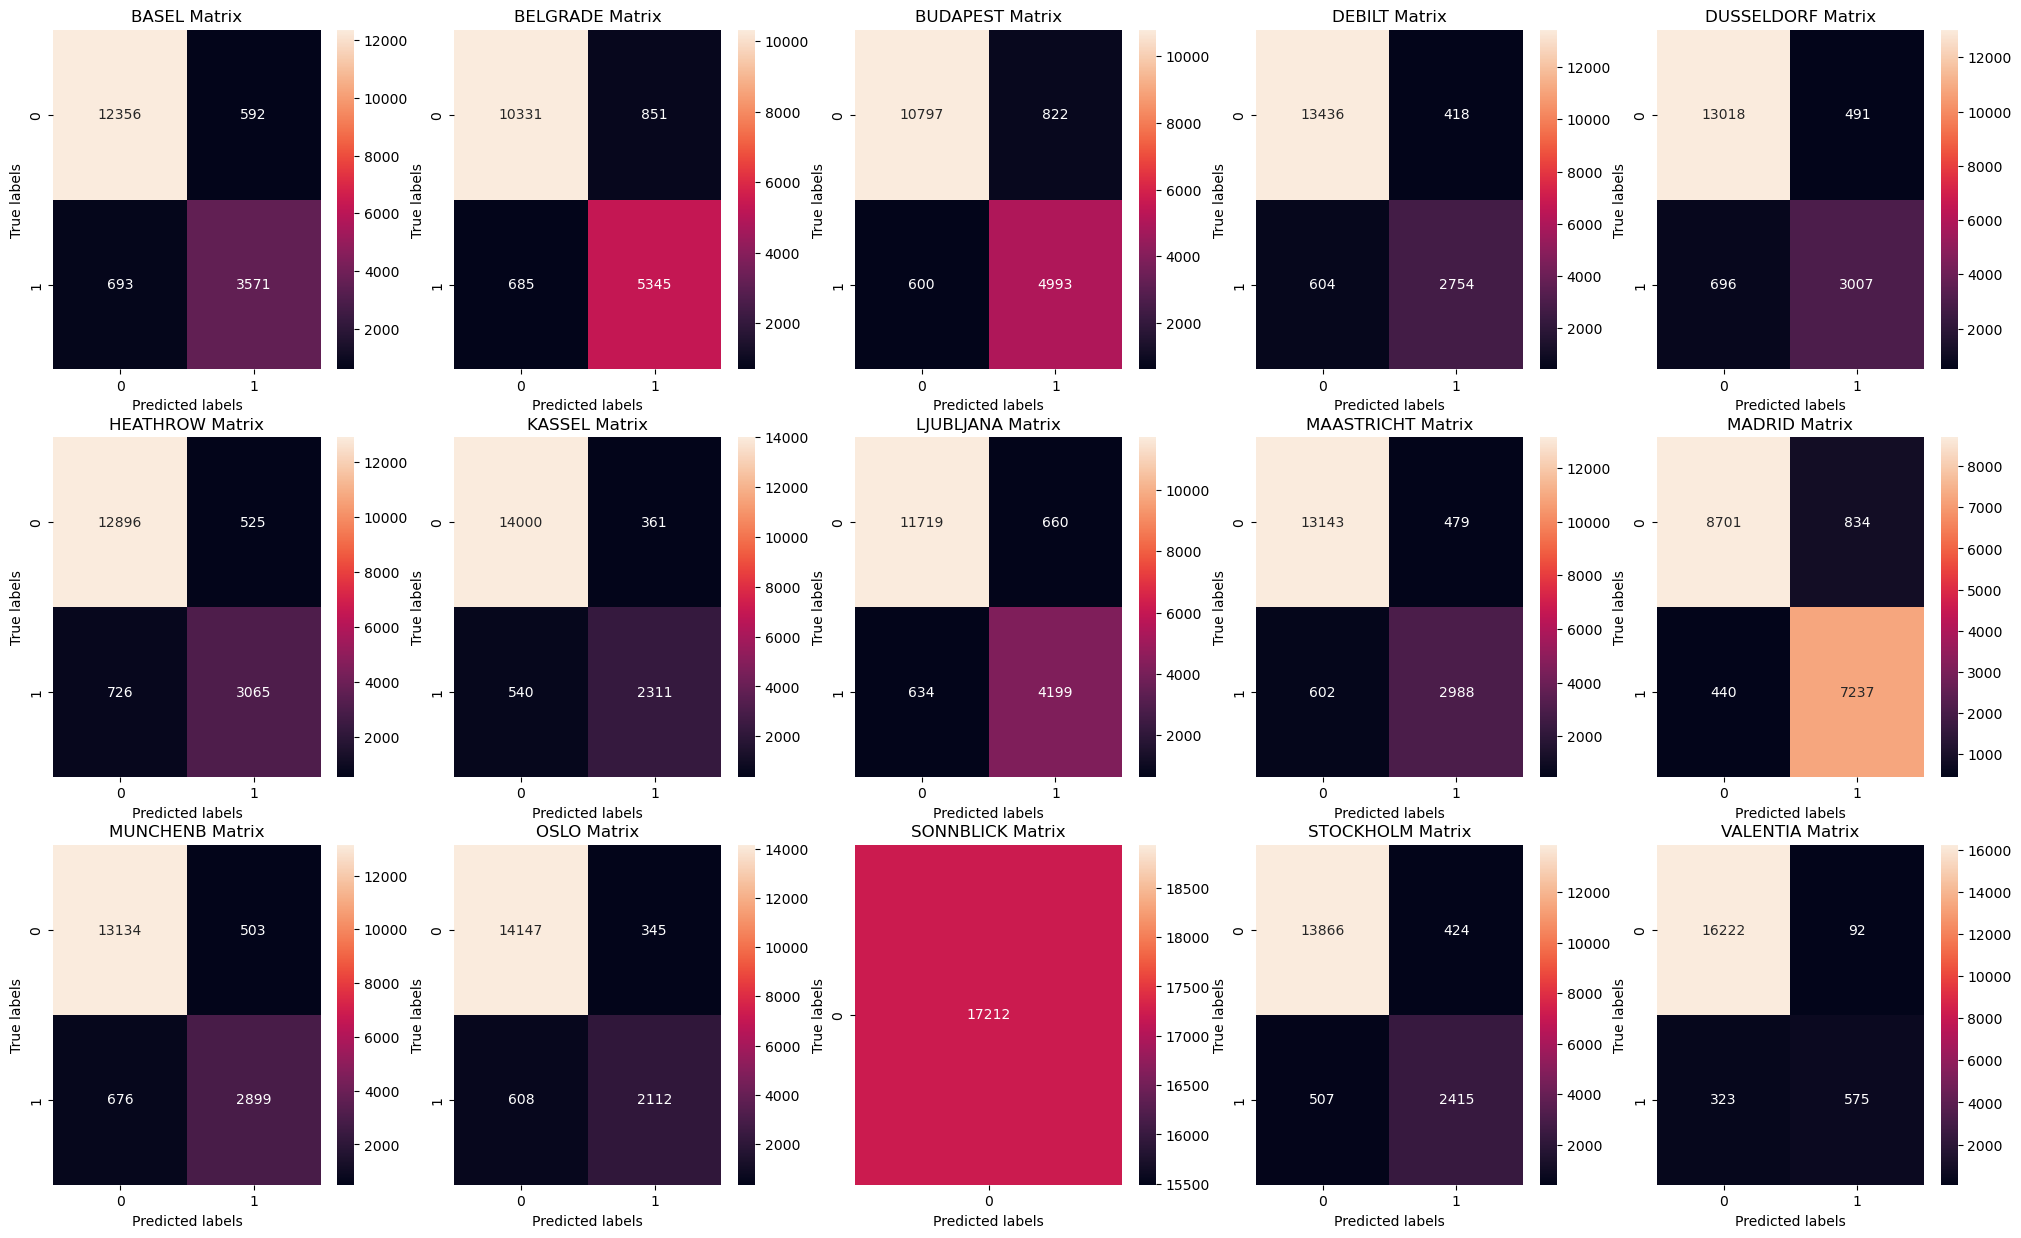

In [76]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### Testing Set Confusion Matrix

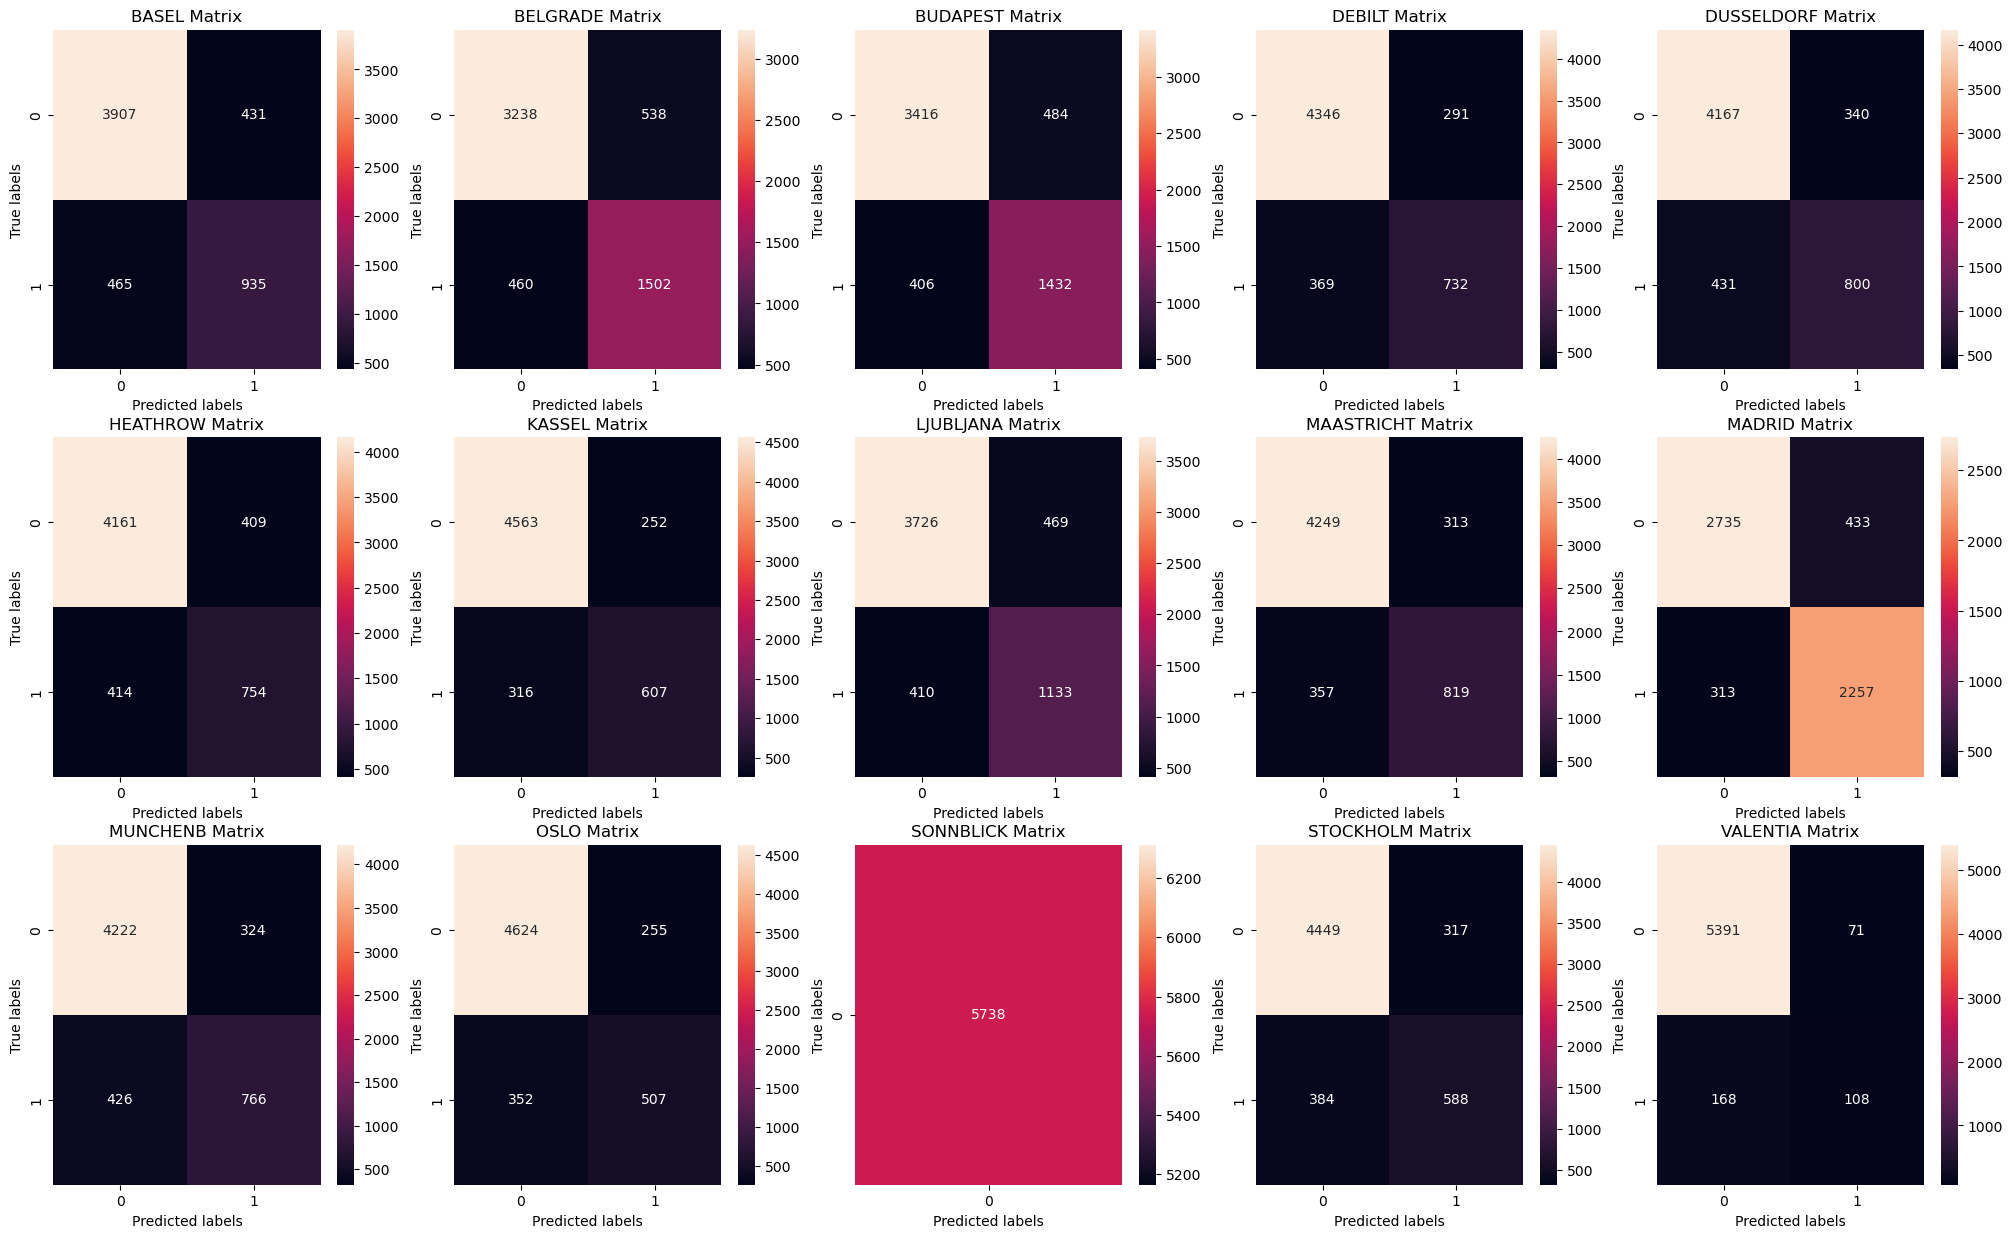

In [59]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1